In [1]:
import warnings
warnings.filterwarnings('ignore')

# Lab 3 Assignment
- In the exercises, you will still use the same dataset after One-Hot Encoding
- The dependent variable is "default payment next month"

__Name:__PUNEETH PANUGANTI

## Starting point - Import and Split dataset
- Split the dataset into training and testing set, with a ratio of 80:20

In [2]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve

In [3]:
df = pd.read_excel('http://fengmai.net//download/courses/2020S-BIA652NT-Pub/Week10-Classification%20and%20Hyperparameter%20Search%20using%20Python/default%20of%20credit%20card%20clients.xls', header = 1).drop('ID', axis = 1)

col = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df2 = pd.get_dummies(df, columns = col, drop_first=True)
df2.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000,24,3913,3102,689,0,0,0,0,689,...,0,0,0,0,0,0,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,1,0,0,0,0,0,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,1,0,0,0,0,0,0,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,1,0,0,0,0,0,0,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,1,0,0,0,0,0,0,0


In [4]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
BILL_AMT2,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0
BILL_AMT3,30000.0,47013.154800,69349.387427,-157264.0,2666.25,20088.5,60164.75,1664089.0
...,...,...,...,...,...,...,...,...
PAY_6_4,30000.0,0.001633,0.040382,0.0,0.00,0.0,0.00,1.0
PAY_6_5,30000.0,0.000433,0.020812,0.0,0.00,0.0,0.00,1.0
PAY_6_6,30000.0,0.000633,0.025159,0.0,0.00,0.0,0.00,1.0
PAY_6_7,30000.0,0.001533,0.039128,0.0,0.00,0.0,0.00,1.0


In [5]:
from sklearn.model_selection import train_test_split
y = df2['default payment next month'].values.astype(float)
x = df2.drop('default payment next month', axis = 1).values.astype(float)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Q1 - Grid-search both C and number of PCs 

Next, we use the gride search procedure to search for both the optimal C (inverse of L2 regularization parameter) and the number of principle components using cross validation on the train set.

- Define a parameter grid such that pca__n_components is 10 to 30, and add C as a parameter that can take the following values: [1000, 100, 10, 1, 0.1, 0.01]. Hint: use `pipe.get_params().keys()` to get the right key for C. 
- Which C and PC combination is the best?

In [6]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [7]:
##### YOUR CODE HERE ######
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA



In [8]:
param = Pipeline([
    ('standardization', preprocessing.StandardScaler()),
    ('pca', PCA()),    
    ('lg', LogisticRegression(solver ='lbfgs', max_iter = 1000))
])

In [9]:
param_1 = {
  'lg__C': [1000, 100, 10, 1, 0.1, 0.01],
  'pca__n_components':  range(10, 30)
}

In [10]:
# grid search using cross validation
grid = GridSearchCV(param, cv = 3, param_grid = param_1, scoring = 'roc_auc', refit=True, verbose=1)
grid_fit = grid.fit(x_train, y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


In [11]:
report(grid.cv_results_)

Model with rank: 1
Mean validation score: 0.764 (std: 0.006)
Parameters: {'lg__C': 1000, 'pca__n_components': 28}

Model with rank: 2
Mean validation score: 0.764 (std: 0.006)
Parameters: {'lg__C': 100, 'pca__n_components': 29}

Model with rank: 3
Mean validation score: 0.764 (std: 0.007)
Parameters: {'lg__C': 1, 'pca__n_components': 28}



## Q2 - Provide AUC in the test set
- Based on Q1, use the best chosen model to provide AUC for the test set

In [12]:
#### YOUR CODE HERE ####
model_fin = grid.best_estimator_

predict = model_fin.predict_proba(x_test)
# The columns that give the predicted probablity of each class
predict[:5]

array([[0.31344262, 0.68655738],
       [0.77890761, 0.22109239],
       [0.85543289, 0.14456711],
       [0.82794381, 0.17205619],
       [0.83129498, 0.16870502]])

AUC: 0.76


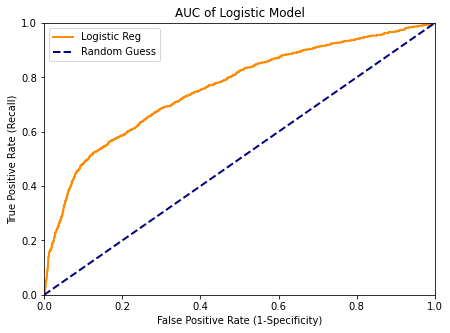

In [13]:
y_test
predict[:, 1]
from sklearn.metrics import roc_curve, auc, precision_recall_curve

fpr, tpr, thresholds = roc_curve(y_test, predict[:, 1])
print('AUC: {:.2f}'.format(auc(fpr, tpr)))

import matplotlib.pyplot as plt
plt.figure(figsize = (7, 5))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'Logistic Reg')
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--', label = 'Random Guess')
plt.title('AUC of Logistic Model')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Recall)' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend()
plt.show()

## Q3 - Confusion matrix, precision, recall, F-1
- When decision threshold is 0.4:
    - Provide Confusion matrix, precision, recall, F-1 for the test set

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

print('classification report:\n', classification_report(y_test, predict[:,1] > 0.4))
print('confusion matrix:\n', confusion_matrix(y_test, predict[:,1] > 0.4))

classification report:
               precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      4703
         1.0       0.63      0.36      0.46      1297

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.80      0.82      0.80      6000

confusion matrix:
 [[4426  277]
 [ 828  469]]


## Q4 - Optimal decision threshold

If the average cost of a false positive prediction is 1, and the cost of a false negative prediction is 2.5, what is the optimal decision threshold that can minimize cost in the test set given your predicted_prob? Provide answer up to 2 decimal places. 

In [15]:

    #### YOUR CODE HERE ####
from numpy import argmax
from numpy import sqrt
from sklearn.metrics import confusion_matrix, classification_report

dt_cost = []
for dt in np.arange(0.0, 1.0, 0.01):
  tn_, fp_, fn_, tp_ = confusion_matrix(y_test, predict[:,1]>dt).ravel()
  cost = fp_ + 2.5 * fn_
  dt_cost.append(cost)

print(f"decision threshold: {dt:.2f}")
   
    
print((np.argmin(dt_cost))/100)

decision threshold: 0.99
0.25
